## Dinámica de Consenso

**Eduardo Carrasco**

### Estados Iniciales:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# determinamos el estado inicial en forma aleatoria, con valores binarios y rango (tamaño de la grilla)
def inicial_random(tamano):
    #estado_inicial_r = [random.randint(0, 1) for _ in range(tamano)]
    estado_inicial_r = np.random.choice([0, 1], size=tamano)
    return estado_inicial_r

In [2]:
# con esta función determinamos un estado inicial seteado al centro.
def inicial_centrado(tamano):
    estado_inicial_s = [0] * tamano
    estado_inicial_s[tamano // 2] = 1
    return estado_inicial_s

In [3]:
def inicial_iterado(tamano):
    estados_iniciales = []
    for i in range(tamano):
        estado = np.zeros(tamano, dtype=int)
        estado[i] = 1
        estados_iniciales.append(estado)
    return estados_iniciales

### Definición vecinos:

In [4]:
def vecinos(estado, i, r):
    tamano = len(estado)
    estado_ext = np.pad(estado, pad_width=r, mode='wrap')
    vecindad = [estado_ext[i + r + j] for j in range(-r, r + 1) if j != 0]
    return vecindad

In [5]:
def regla_totalistica(vecindad, suma_vecinos):
    suma = sum(vecindad)
    if suma in suma_vecinos:
        return 1
    else:
        return 0

In [6]:
def siguiente_generacion(estado, r, suma_vecinos):
    tamano = len(estado)
    nueva_generacion = np.zeros(tamano, dtype=int)

    for i in range(tamano):
        vecindad = vecinos(estado, i, r)
        nueva_generacion[i] = regla_totalistica(vecindad, suma_vecinos)

    return nueva_generacion

In [7]:
def automata_celular(r, tamano, generaciones, estado_inicial, suma_vecinos):
    automata = np.zeros((generaciones, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1], r, suma_vecinos)
    
    return automata

In [8]:
def visualizar_automata(automata):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    print(f"  Radio: {r}")
    print(f"  Número de Generaciones: {generaciones}")
    print(f"  Tamaño de la grilla: {tamano}")
    #print(f"  Período del Ciclo: {periodo_ciclo}")
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    plt.show()

In [9]:
def guardar_automata(automata, nombre_archivo="automata.png", ruta_carpeta="0. ACU/0. ACU_combinatoria"):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    plt.title(f"Radio: {r}\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}\nSuma Vecinos: {suma_vecinos}")
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    
    # Crear el nombre del archivo utilizando las variables
    nombre_archivo = f"UCA_R{r}_{tamano}_r{suma_vecinos}.png"
    
    # Guardar la imagen en la misma carpeta del script con el nombre especificado
    plt.savefig(ruta_carpeta + nombre_archivo, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close()

In [10]:
## función para calcular el patron de comportamiento
def patron_ciclo(automata):
    n_filas = len(automata) #total generaciones
    # se generan dos ciclos para i (estado inicial) y j (estado inicial + 1 "siguiente")
    for i in range(n_filas):
        for j in range(i + 1, n_filas):
            #comparamos ambos ciclos
            if np.array_equal(automata[i], automata[j]):
                # si son iguales, el período se resta al otro (j-i)
                return j - i
    # caso contrario, la función dice None            
    return 'No hay ciclo'

  Radio: 2
  Número de Generaciones: 50
  Tamaño de la grilla: 50


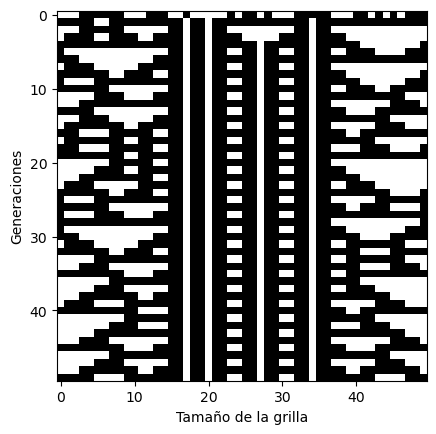

In [11]:
# Parámetros
r = 2
tamano = 50
generaciones = 50
suma_vecinos = [1,2,3] #regla totalistica
estado_inicial = inicial_random(tamano) #centrado o random
#estado_inicial = [0,0,0,0,1,0,0,0,0] #en base al tamaño de la variable tamano

# Ejecución del autómata celular
automata = automata_celular(r, tamano, generaciones, estado_inicial, suma_vecinos)
visualizar_automata(automata)
periodo_ciclo = patron_ciclo(automata)
#guardar_automata(automata, "mi_automata.png", "0. ACU/")

### Generación Múltiple de Combinaciones:

In [ ]:
def automata_celular(r, tamano, generaciones, estado_inicial, suma_vecinos):
    automata = np.zeros((generaciones, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1], r, suma_vecinos)
    
    return automata

In [ ]:
def guardar_automata(automata, r, generaciones, tamano, ruta_carpeta, nombre_archivo):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    plt.title(f"Radio: {r}\n Generaciones: {generaciones}\n Tamaño: {tamano}\n Regla:{suma_vecinos}")
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    plt.savefig(f"{ruta_carpeta}/{nombre_archivo}.png", dpi=300)
    plt.close()

In [ ]:
def simular_todas_combinaciones(r, tamano, generaciones, suma_vecinos, ruta_carpeta):
    estados = [list(map(int, list(format(i, f"0{tamano}b")))) for i in range(2 ** tamano)]

    for pos in range(len(estados)):
        estado_inicial = np.array(estados[pos]).copy()
        automata = automata_celular(r, tamano, generaciones, estado_inicial, suma_vecinos)
        nombre_archivo = f"automata_r{r}_estado{pos}.png"
        guardar_automata(automata, r, generaciones, tamano, ruta_carpeta, nombre_archivo)

In [ ]:
def ejecutar_y_guardar_automatas(r, tamano, generaciones, ruta_carpeta, suma_vecinos):
    estados_iniciales = simular_todas_combinaciones(r, tamano, generaciones, suma_vecinos, ruta_carpeta)

    for idx, estado_inicial in enumerate(estados_iniciales):
        automata = automata_celular(r, tamano, generaciones, estado_inicial, suma_vecinos)
        guardar_automata(automata, r, generaciones, tamano, ruta_carpeta, f"UCA_R{r}_r{suma_vecinos}_{idx}")

In [ ]:
r = 1
tamano = 4
generaciones = 10
suma_vecinos = [2]
ruta_carpeta = "0. ACU/0. ACU_combinatoria"

ejecutar_y_guardar_automatas(r, tamano, generaciones, ruta_carpeta, suma_vecinos)

### Métricas:

#### Entropía:

In [ ]:
from scipy.stats import entropy
def calcular_entropia(automata):
    entropias = []
    for fila in automata:
        # Contamos la cantidad de 1 y 0 en cada fila
        unique, counts = np.unique(fila, return_counts=True)
        frecuencias = dict(zip(unique, counts))
        # Calculamos la probabilidad de 0 y 1 en cada fila
        probs = [frecuencias.get(i, 0) / len(fila) for i in [0, 1]]
        entropias.append(entropy(probs, base=2))
    return np.array(entropias)

In [ ]:
def graficar_entropia(entropias):
    plt.plot(entropias)
    plt.xlabel('Generación')
    plt.ylabel('Entropía')
    plt.title('Entropía por generación')
    plt.show()

In [ ]:
# Cálculo y gráfico de la entropía en f de las generaciones:
entropias = calcular_entropia(automata)
graficar_entropia(entropias)

#### Densidad 1's

In [ ]:
# Evolución de la densidad de 1, por generación.
def calcular_densidad(automata):
    #sumamos los valores y dividimos por el shape, tamaño grilla
    densidades = np.sum(automata == 1, axis=1) / automata.shape[1]
    return densidades

In [ ]:
def graficar_densidad(densidades):
    plt.plot(densidades)
    plt.xlabel('Generación')
    plt.ylabel('Densidad de 1')
    plt.title('Densidad de 1 por generación')
    plt.show()

In [ ]:
# Cálculo y gráfico de la densidad de 1:
densidades = calcular_densidad(automata)
graficar_densidad(densidades)

#### Densidad de 0's

In [ ]:
# Evolución de la densidad de 1, por generación.
def calcular_densidad_0(automata):
    #sumamos los valores y dividimos por el shape, tamaño grilla
    densidades_0 = np.sum(automata == 0, axis=1) / automata.shape[1]
    return densidades_0

In [ ]:
def graficar_densidad_0(densidades_0):
    plt.plot(densidades_0)
    plt.xlabel('Generación')
    plt.ylabel('Densidad de 0')
    plt.title('Densidad de 0 por generación')
    plt.show()

In [ ]:
# Cálculo y gráfico de la densidad de 0:
densidades_0 = calcular_densidad_0(automata)
graficar_densidad_0(densidades_0)

In [ ]:
tamano = 10
estados = inicial_iterado(tamano)
for estado in estados:
    print(estado)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

def inicial_random(tamano):
    np.random.seed(218)
    estado_inicial_r = np.random.choice([0, 1], size=(tamano, tamano), p=[0.5, 0.5])
    return estado_inicial_r

In [ ]:
def inicial_centrado(tamano):
    estado_inicial_s = [0] * tamano
    estado_inicial_s[tamano // 2] = 1
    return estado_inicial_s

In [ ]:
def vecinos(estado, i, j, r):
    tamano = estado.shape[0]
    vecindad = []
    for di in range(-r, r + 1):
        for dj in range(-r, r + 1):
            if di == 0 and dj == 0:
                continue
            ni = (i + di) % tamano
            nj = (j + dj) % tamano
            vecindad.append(estado[ni, nj])
    return np.array(vecindad)

In [ ]:
def regla_totalistica(vecindad, suma_vecinos):
    suma = sum(vecindad)
    if suma in suma_vecinos:
        return 1
    else:
        return 0

In [ ]:
def siguiente_generacion(estado, r, suma_vecinos):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j, r)
            nueva_generacion[i, j] = regla_totalistica(vecindad, suma_vecinos)

    return nueva_generacion

In [ ]:
def automata_celular(r, tamano, generaciones, estado_inicial, suma_vecinos):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1], r, suma_vecinos)
    
    return automata

In [ ]:
def visualizar_automata(automata, r, generaciones, tamano):
    fig, axs = plt.subplots(1, generaciones, figsize=(15, 15))

    for t in range(generaciones):
        axs[t].imshow(automata[t], cmap='Greys', interpolation='nearest', vmin=0, vmax=1)
        axs[t].set_xlabel('X')
        axs[t].set_ylabel('Y')
        axs[t].set_title(f'Generación {t} \nRadio: {r} \nTamaño: {tamano}')
        axs[t].set_xticks([])
        axs[t].set_yticks([])

    plt.show()

In [ ]:
def crear_gif(automata, r, tamano, generaciones):
    nombre_archivo = f"BCA_r{r}_s{tamano}_gen{generaciones}.gif"

    imagenes = []
    for idx, matriz in enumerate(automata):
        imagen = plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        titulo = f"Generación {idx} \nRadio {r} \nTamaño Grilla {tamano}"
        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=10) #con fps regulo la tasa de imagenes por segundo

In [ ]:
# Ejemplo de uso
r = 1
tamano = 10
generaciones = 6
estado_inicial = inicial_random(tamano)
suma_vecinos = [2]

# Ejecución del autómata celular
automata = automata_celular(r, tamano, generaciones, estado_inicial, suma_vecinos)

## Generación visualización condicionada a cantidad de generaciones.
visualizar_automata(automata, r, generaciones, tamano)

In [ ]:
crear_gif(automata, r, tamano, generaciones)